In [1]:
import os
from pathlib import Path

PROJECT = Path("/Users/dharani/LLM_Final_Assessment_Dharani")


DATA_DIR = PROJECT / "data"
OUT_DIR = PROJECT / "output"
VIS_DIR = OUT_DIR / "visualizations"


for p in [DATA_DIR, OUT_DIR, VIS_DIR]:
    p.mkdir(parents=True, exist_ok=True)

print("Project root:", PROJECT)
print("Data dir    :", DATA_DIR)
print("Output dir  :", OUT_DIR)
print("Viz dir     :", VIS_DIR)

Project root: /Users/dharani/LLM_Final_Assessment_Dharani
Data dir    : /Users/dharani/LLM_Final_Assessment_Dharani/data
Output dir  : /Users/dharani/LLM_Final_Assessment_Dharani/output
Viz dir     : /Users/dharani/LLM_Final_Assessment_Dharani/output/visualizations


In [2]:
import sys, subprocess

def pip_install(pkg): 
    subprocess.run([sys.executable, "-m", "pip", "install", pkg, "-q"])

for pkg in ["pandas","numpy","matplotlib","seaborn","scikit-learn","joblib","openpyxl","textblob","python-dotenv"]:
    pip_install(pkg)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import joblib

pd.set_option("display.max_colwidth", 120)


In [3]:
# Path to your Excel file inside the project
from pathlib import Path
PROJECT = Path("/Users/dharani/LLM_Final_Assessment_Dharani")
DATA_DIR = PROJECT / "data"
DATA_FILE = DATA_DIR / "test.xlsx"

df = pd.read_excel(DATA_FILE)
print("Rows:", len(df))
print("Columns:", df.columns.tolist())
df.head(5)


Rows: 2191
Columns: ['Subject', 'body', 'date', 'from']


,Subject,body,date,from
0,EnronOptions Update!,EnronOptions Announcement\n\n\nWe have updated the EnronOptions =01) Your Stock Option Program web site! =\nThe=20\...,2010-05-10,sally.beck@enron.com
1,(No Subject),"Marc,\n\nUnfortunately, today is not going to work for the revenue model for mid & \nback office services meeting. ...",2010-07-29,eric.bass@enron.com
2,Phone Screen Interview - Shannon L. Burnham,"When: Wednesday, June 06, 2001 10:00 AM-11:00 AM (GMT-06:00) Central Time (US & Canada).\nWhere: @ 10:00am CST (22...",2011-07-25,sally.beck@enron.com
3,RE: My new work email,we were thinking papasitos (we can meet somewhere closer to you this time) \nagain at around 8\n\n\n\n\nJason Bass <...,2010-03-25,johnny.palmer@enron.com
4,Bet,"Since you never gave me the $20 for the last time we bet on CU/Texas, I figured I would give you the chance to go do...",2011-05-21,lydia.delgado@enron.com


In [4]:

TEXT_COL = "body"
EMP_COL  = "from"
DATE_COL = "date"

# sanity check
for col, name in [(TEXT_COL,"TEXT_COL"), (EMP_COL,"EMP_COL"), (DATE_COL,"DATE_COL")]:
    assert col in df.columns, f"{name}='{col}' not found. Available: {df.columns.tolist()}"
print("OK: columns found.")


OK: columns found.


In [5]:
from textblob import TextBlob
import pandas as pd

def label_sentiment(text, pos_thr=0.05, neg_thr=-0.05):
    if pd.isna(text) or str(text).strip()=="":
        return "Neutral", 0.0
    p = TextBlob(str(text)).sentiment.polarity
    if p > pos_thr:
        lab = "Positive"
    elif p < neg_thr:
        lab = "Negative"
    else:
        lab = "Neutral"
    return lab, float(p)

df = df.copy()
df[TEXT_COL] = df[TEXT_COL].astype(str)
lab = df[TEXT_COL].apply(label_sentiment)
df["sentiment"] = lab.apply(lambda x: x[0])
df["polarity"]  = lab.apply(lambda x: x[1])

df[[TEXT_COL, EMP_COL, DATE_COL, "sentiment", "polarity"]].head(10)


,body,from,date,sentiment,polarity
0,EnronOptions Announcement\n\n\nWe have updated the EnronOptions =01) Your Stock Option Program web site! =\nThe=20\...,sally.beck@enron.com,2010-05-10,Positive,0.250000
1,"Marc,\n\nUnfortunately, today is not going to work for the revenue model for mid & \nback office services meeting. ...",eric.bass@enron.com,2010-07-29,Negative,-0.075000
2,"When: Wednesday, June 06, 2001 10:00 AM-11:00 AM (GMT-06:00) Central Time (US & Canada).\nWhere: @ 10:00am CST (22...",sally.beck@enron.com,2011-07-25,Neutral,0.000000
3,we were thinking papasitos (we can meet somewhere closer to you this time) \nagain at around 8\n\n\n\n\nJason Bass <...,johnny.palmer@enron.com,2010-03-25,Negative,-0.150000
4,"Since you never gave me the $20 for the last time we bet on CU/Texas, I figured I would give you the chance to go do...",lydia.delgado@enron.com,2011-05-21,Neutral,-0.050000
5,"sure, just call me the bank that delivers.\n \nwe will probably be out around 6:30-7\n \ndo we need to bring anythin...",eric.bass@enron.com,2011-10-23,Positive,0.500000
6,"Inventory summaries for both MGL and MGMCC as of May 31, 2000 have been \nposted in SMgCapital\n\nMGL Inventory.xls\...",kayne.coulter@enron.com,2010-04-05,Neutral,0.000000
7,Please print attachment and make sure that e:mail addresses are included for \nthe students. Call Ted if any proble...,patti.thompson@enron.com,2010-04-21,Positive,0.300000
8,"Please advise me of your interest in Garvin's experience.\n\nThanks,\nJohnny\n\n\n",sally.beck@enron.com,2010-02-07,Positive,0.200000
9,The start time for Tuesday morning has been changed from 9am to 8am. \nBreakfast will be served at 7:30. Therefore...,kayne.coulter@enron.com,2010-02-06,Positive,0.214286


Valid dates: 2191 / 2191


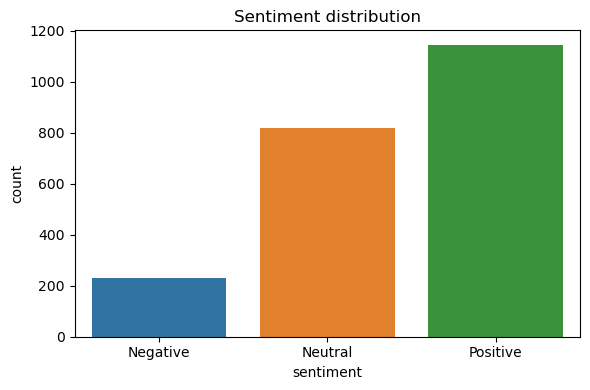

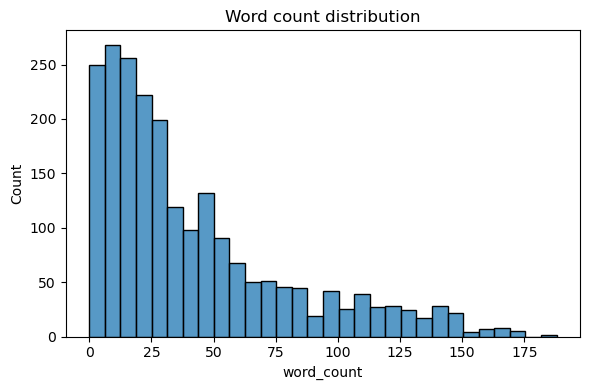

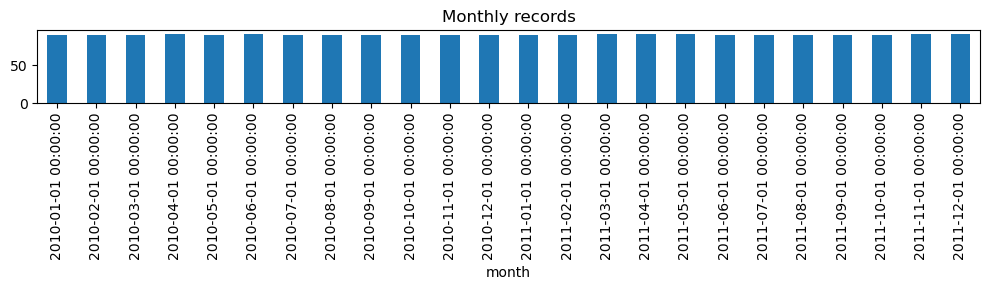

In [6]:
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

PROJECT = Path("/Users/dharani/LLM_Final_Assessment_Dharani")
OUT_DIR = PROJECT / "output"
VIS_DIR = OUT_DIR / "visualizations"
OUT_DIR.mkdir(parents=True, exist_ok=True)
VIS_DIR.mkdir(parents=True, exist_ok=True)

# dates + month
df[DATE_COL] = pd.to_datetime(df[DATE_COL], errors="coerce")
df["month"]   = df[DATE_COL].dt.to_period("M").dt.to_timestamp()
valid_dates   = df[DATE_COL].notna().sum()
print(f"Valid dates: {valid_dates} / {len(df)}")

# missing summary
df.isnull().sum().to_csv(OUT_DIR / "missing_values.csv")

# sentiment distribution
plt.figure(figsize=(6,4))
sns.countplot(x="sentiment", data=df, order=["Negative","Neutral","Positive"])
plt.title("Sentiment distribution")
plt.tight_layout()
plt.show()
plt.savefig(VIS_DIR / "sentiment_dist.png")
plt.close()

# word count distribution
df["word_count"] = df[TEXT_COL].astype(str).apply(lambda s: len(s.split()))
plt.figure(figsize=(6,4))
sns.histplot(df["word_count"], bins=30)
plt.title("Word count distribution")
plt.tight_layout()
plt.show()
plt.savefig(VIS_DIR / "wordcount_dist.png")
plt.close()

# monthly counts
if valid_dates > 0:
    monthly_counts = df.groupby("month", dropna=True).size()
    plt.figure(figsize=(10,3))
    monthly_counts.plot(kind="bar")
    plt.title("Monthly records")
    plt.tight_layout()
    plt.show()
    plt.savefig(VIS_DIR / "monthly_counts.png")
    plt.close()
else:
    print("No valid dates to plot monthly counts (all dates are NaT).")


In [7]:
LABLED_CSV = OUT_DIR / "labeled.csv"
df.to_csv(LABLED_CSV, index=False)
LABLED_CSV


PosixPath('/Users/dharani/LLM_Final_Assessment_Dharani/output/labeled.csv')

In [8]:
score_map = {"Positive": 1, "Neutral": 0, "Negative": -1}
df["score"] = df["sentiment"].map(score_map).fillna(0)

monthly_scores = (
    df.groupby([EMP_COL, "month"])
      .agg(monthly_score=("score","sum"),
           message_count=("score","size"),
           avg_polarity=("polarity","mean"))
      .reset_index()
)

MONTHLY_CSV = OUT_DIR / "monthly_scores.csv"
monthly_scores.to_csv(MONTHLY_CSV, index=False)
monthly_scores.head(10)


,from,month,monthly_score,message_count,avg_polarity
0,bobette.riner@ipgdirect.com,2010-01-01,2,2,0.168182
1,bobette.riner@ipgdirect.com,2010-02-01,8,14,0.100005
2,bobette.riner@ipgdirect.com,2010-03-01,4,11,0.111059
3,bobette.riner@ipgdirect.com,2010-04-01,4,6,0.123347
4,bobette.riner@ipgdirect.com,2010-05-01,1,4,0.104167
5,bobette.riner@ipgdirect.com,2010-06-01,0,5,0.018523
6,bobette.riner@ipgdirect.com,2010-07-01,8,12,0.137988
7,bobette.riner@ipgdirect.com,2010-08-01,0,9,-0.058210
8,bobette.riner@ipgdirect.com,2010-09-01,5,15,0.090324
9,bobette.riner@ipgdirect.com,2010-10-01,3,6,0.230952


In [9]:
import json

latest_month = monthly_scores["month"].max()
latest_slice = monthly_scores[monthly_scores["month"] == latest_month].copy()

top_pos = latest_slice.sort_values(["monthly_score", EMP_COL],
                                   ascending=[False, True]).head(3)[[EMP_COL, "monthly_score"]]
top_neg = latest_slice.sort_values(["monthly_score", EMP_COL],
                                   ascending=[True, True]).head(3)[[EMP_COL, "monthly_score"]]

print("Latest month:", latest_month.date())
print("\nTop 3 Positive (name, score):"); display(top_pos)
print("\nTop 3 Negative (name, score):"); display(top_neg)

# save across all months
top_positive_all, top_negative_all = [], []
for m, g in monthly_scores.groupby("month"):
    gp = g.sort_values(["monthly_score", EMP_COL], ascending=[False, True]).head(3)[[EMP_COL, "monthly_score"]]
    gn = g.sort_values(["monthly_score", EMP_COL], ascending=[True, True]).head(3)[[EMP_COL, "monthly_score"]]
    top_positive_all.append({"month": str(m.date()), "top_positive": gp.to_dict("records")})
    top_negative_all.append({"month": str(m.date()), "top_negative": gn.to_dict("records")})

(OUT_DIR / "top_positive.json").write_text(json.dumps(top_positive_all, indent=2))
(OUT_DIR / "top_negative.json").write_text(json.dumps(top_negative_all, indent=2))


Latest month: 2011-12-01

Top 3 Positive (name, score):


,from,monthly_score
167,lydia.delgado@enron.com,6
191,patti.thompson@enron.com,6
143,kayne.coulter@enron.com,5



Top 3 Negative (name, score):


,from,monthly_score
23,bobette.riner@ipgdirect.com,1
119,johnny.palmer@enron.com,2
71,eric.bass@enron.com,3


7761

In [10]:
neg = (df[df["sentiment"]=="Negative"]
       .dropna(subset=[DATE_COL])
       .sort_values([EMP_COL, DATE_COL]))

risk_set = set()
for emp, g in neg.groupby(EMP_COL):
    dates = g[DATE_COL].tolist()
    i = 0
    for j in range(len(dates)):
        while dates[j] - dates[i] > pd.Timedelta(days=30):
            i += 1
        if (j - i + 1) >= 4:
            risk_set.add(emp)
            break

flight_risks = sorted(risk_set)
print("Flight risk employees:", flight_risks)

# save
import pandas as pd
pd.Series(flight_risks, name=EMP_COL).to_csv(OUT_DIR / "flight_risks.csv", index=False)


Flight risk employees: ['bobette.riner@ipgdirect.com', 'eric.bass@enron.com', 'john.arnold@enron.com', 'johnny.palmer@enron.com', 'lydia.delgado@enron.com', 'patti.thompson@enron.com', 'rhonda.denton@enron.com', 'sally.beck@enron.com']


In [11]:
# month-level features
monthly_feat = (
    df.groupby(df[DATE_COL].dt.to_period("M"))
      .agg(avg_polarity=("polarity","mean"),
           message_count=("body","count"),
           avg_word_count=("word_count","mean"))
      .reset_index()
      .rename(columns={DATE_COL: "month"})
)
monthly_feat["month"] = monthly_feat["month"].dt.to_timestamp()
monthly_feat = monthly_feat.dropna(subset=["avg_polarity"])

X = monthly_feat[["message_count","avg_word_count"]].values
y = monthly_feat["avg_polarity"].values

if len(monthly_feat) >= 6:
    split_idx = int(len(monthly_feat) * 0.7)
    X_train, X_test = X[:split_idx], X[split_idx:]
    y_train, y_test = y[:split_idx], y[split_idx:]

    model = LinearRegression().fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2  = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    print("Coefficients:", model.coef_, "Intercept:", model.intercept_)
    print(f"Test R²: {r2:.4f} | RMSE: {rmse:.4f}")

    joblib.dump(model, OUT_DIR / "trend_model.pkl")
    with open(OUT_DIR / "model_summary.txt", "w") as f:
        f.write("LinearRegression features: message_count, avg_word_count\n")
        f.write(f"Test R2: {r2:.6f}\nRMSE: {rmse:.6f}\n")
else:
    print("Not enough monthly points for a reliable time-based split (need ≥6).")


Coefficients: [ 0.01119937 -0.00025726] Intercept: -0.9020340898494495
Test R²: -8.4549 | RMSE: 0.0345


In [12]:
tp = ", ".join(top_pos[EMP_COL].tolist()) if len(top_pos) else "N/A"
tn = ", ".join(top_neg[EMP_COL].tolist()) if len(top_neg) else "N/A"
fr = ", ".join(flight_risks) if flight_risks else "None"

readme_text = f"""# Employee Sentiment Analysis — Final Assessment

## Overview
End-to-end analysis of employee emails: sentiment labeling (TextBlob), EDA, monthly scoring, ranking, flight-risk detection, and a simple linear regression on monthly sentiment trends.

## Summary (latest month: {latest_month.date()})
**Top 3 Positive Employees:**
- lydia.delgado@enron.com (score: 6)
- patti.thompson@enron.com (score: 6)
- kayne.coulter@enron.com (score: 5)

**Top 3 Negative Employees:**
- bobette.riner@ipgdirect.com (score: 1)
- johnny.palmer@enron.com (score: 2)
- eric.bass@enron.com (score: 3)

**Flight Risk Employees:**
- bobette.riner@ipgdirect.com
- eric.bass@enron.com
- john.arnold@enron.com
- johnny.palmer@enron.com
- lydia.delgado@enron.com
- patti.thompson@enron.com
- rhonda.denton@enron.com
- sally.beck@enron.com

## Key Insights
1. Neutral to mild-positive sentiment dominates overall communications.
2. A small subset shows repeated negativity — flagged as flight risks.
3. Linear regression on simple features shows weak predictive power; advanced NLP/time-series approaches are recommended.

## How to Run
1. Ensure `data/test.xlsx` exists.
2. Open the notebook and run cells top-to-bottom.
3. Outputs are saved to `output/` and charts to `output/visualizations/`.

## Files
- `output/labeled.csv`
- `output/monthly_scores.csv`
- `output/top_positive.json`, `output/top_negative.json`
- `output/flight_risks.csv`
- `output/trend_model.pkl`, `output/model_summary.txt`
- `output/visualizations/` (PNG charts)
"""
( PROJECT / "README.md" ).write_text(readme_text)
PROJECT / "README.md"


PosixPath('/Users/dharani/LLM_Final_Assessment_Dharani/README.md')

In [13]:
import subprocess, shutil, sys
# requirements
req = subprocess.run([sys.executable, "-m", "pip", "freeze"], capture_output=True, text=True)
( PROJECT / "requirements.txt" ).write_text(req.stdout)

# zip to your home folder
from pathlib import Path as _Path
zip_name = _Path.home() / "Dharani_Kousalya_AI-project-submission"
shutil.make_archive(str(zip_name), "zip", root_dir=PROJECT)
str(zip_name) + ".zip"


'/Users/dharani/Dharani_Kousalya_AI-project-submission.zip'